# ML-MAJOR PROJECT

#### Problem Statement:
                You will be predicting the costs of used(OLD) cars given the data collected from various sources and distributed across various locations in India.
#### About the dataset:-
             The given dataset is in a CSV(comma separated values) format,firstly it wasn't in UTF-encoded format so using  excel 2016 and got it into the required format.Now,There are a lot of variables when we explore the dataset.It has different features like :-Name,Location,Year,Kilometers Driven,Fuel Type,Transmission,Owner Type,Mileage,Engine,Power,Seats.. and so on.
             With the given we have to predict the price of the  old cars.SO lets get in and have some fun :).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, preprocessing, svm
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
import math
import matplotlib
import seaborn as sns
%matplotlib inline

In [2]:
s_data = pd.read_excel('Data_Train.xlsx')

# 1. Identifying Outliers

In [3]:
#Outlier Identification
#Calculating the maximum value (max_thresold) i.e the values higher than max_thresold will be considered as Outlier
max_threshold=s_data["Price"].quantile(0.95)
max_threshold

32.44599999999997

In [4]:
s_data[s_data["Price"] > max_threshold]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0 kmpl,1950 CC,194 bhp,5.0,35.67
92,Audi A6 2011-2015 35 TDI Premium,Coimbatore,2018,48367,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,39.58
134,Mercedes-Benz SLC 43 AMG,Kolkata,2017,13372,Petrol,Automatic,First,19.0 kmpl,2996 CC,362.07 bhp,2.0,54.00
148,Audi RS5 Coupe,Mumbai,2013,23000,Petrol,Automatic,First,11.05 kmpl,2894 CC,444 bhp,4.0,37.00
168,BMW X5 xDrive 30d,Mumbai,2015,41000,Diesel,Automatic,First,15.3 kmpl,2993 CC,258 bhp,5.0,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5919,Jaguar F Type 5.0 V8 S,Hyderabad,2015,8000,Petrol,Automatic,First,12.5 kmpl,5000 CC,488.1 bhp,2.0,100.00
5921,Mercedes-Benz E-Class 2015-2017 E250 CDI Avant...,Mumbai,2016,21000,Diesel,Automatic,First,13.0 kmpl,2143 CC,204 bhp,5.0,36.00
5927,Audi Q5 3.0 TDI Quattro Technology,Coimbatore,2018,29091,Diesel,Automatic,First,13.22 kmpl,2967 CC,241.4 bhp,5.0,45.52
5946,BMW 5 Series 2013-2017 530d M Sport,Bangalore,2016,16000,Diesel,Automatic,First,14.69 kmpl,2993 CC,258 bhp,5.0,48.00


In [5]:
#calculating the minimum value (min_thresold) i.e the values lower than the min_thresold will be considered as Outlier
min_threshold=s_data["Price"].quantile(0.05)
min_threshold

1.7

In [6]:
s_data[s_data["Price"]<min_threshold]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
40,Maruti Alto LXi,Delhi,2008,90000,Petrol,Manual,Second,19.7 kmpl,796 CC,46.3 bhp,5.0,1.25
41,Tata Nano LX SE,Kochi,2014,19698,Petrol,Manual,First,25.4 kmpl,624 CC,37.5 bhp,4.0,1.53
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85
136,Maruti Alto LXi BSIII,Chennai,2010,94385,Petrol,Manual,Second,19.7 kmpl,796 CC,46.3 bhp,5.0,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0 kmpl,1086 CC,62 bhp,5.0,1.39
5976,Maruti Wagon R LX BSIII,Delhi,2006,65771,Petrol,Manual,Second,17.3 kmpl,1061 CC,64 bhp,5.0,0.75
5977,Tata Indica LEI,Pune,2006,78000,Petrol,Manual,Second,13.5 kmpl,1405 CC,60 bhp,5.0,1.00
5986,Hyundai Getz GLS,Jaipur,2005,100000,Petrol,Manual,Second,15.3 kmpl,1341 CC,83 bhp,5.0,0.85


# 2. Null values

In [7]:
s_data.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
s_data['Mileage'] = s_data['Mileage'].apply(lambda x : str(x).split(' ')[0]).astype(float)
s_data['Engine'] = s_data['Engine'].apply(lambda x : str(x).split(" ")[0]).astype(float)
s_data['Power'] = s_data['Power'].replace('null bhp','0 bhp').apply(lambda x : str(x).split(' ')[0]).astype(float)

In [9]:
s_data['Car_Brand1'] = s_data['Name'].apply(lambda x: ' '.join(x.split(' ')[:2]))

In [10]:
s_data['Mileage'] = s_data.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Mileage']
s_data['Engine'] = s_data.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Engine']
s_data['Power'] = s_data.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Power']
s_data['Seats'] = s_data.groupby(['Car_Brand1']).transform(lambda x: x.fillna(x.median()))['Seats']

In [11]:
s_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                3
Price                0
Car_Brand1           0
dtype: int64

In [12]:
s_data=s_data[s_data['Seats'].notna()]
print('Shape of train data after dropping Seats:',s_data.shape)

Shape of train data after dropping Seats: (6016, 13)


In [13]:
s_data=s_data[s_data['Mileage'].notna()]
print('Shape of train data after dropping Mileage:',s_data.shape)

Shape of train data after dropping Mileage: (6014, 13)


In [14]:
s_data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Brand1           0
dtype: int64

# 3. Exploratory Data Analysis(EDA)

In [15]:
# CHECKING THE FIRST 5 ROWS OF THE DATA SET.
s_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand1
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi A4


In [16]:
#CHECKING THE LAST 5 ROWS OF THE DATASET
s_data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand1
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.0,5.0,4.75,Maruti Swift
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.0,5.0,4.00,Hyundai Xcent
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.0,8.0,2.90,Mahindra Xylo
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.1,5.0,2.65,Maruti Wagon
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44,936.0,57.6,5.0,2.50,Chevrolet Beat


In [17]:
#CHECKING THE SHAPE OF THE DATASET
s_data.shape

(6014, 13)

In [18]:
#CHECKING THE OVERVIEW STATISTICS OF THE DATASET FOR CENTRAL TENDENCY, COUNT, MAX AND MIN SCORE
s_data.describe()


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6014.000000,6.014000e+03,6014.000000,6014.000000,6014.000000,6014.000000,6014.000000
mean,2013.360492,5.874714e+04,18.134280,1620.727802,111.183741,5.277353,9.482112
std,3.269035,9.130613e+04,4.583331,600.287096,55.494266,0.806940,11.191117
min,1998.000000,1.710000e+02,0.000000,624.000000,0.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,92.000000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


In [19]:
s_data.columns.tolist()

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Car_Brand1']

In [20]:
#CHECKING THE UNIQUE VALUES
s_data.nunique()

Name                 1873
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               430
Engine                145
Power                 369
Seats                   9
Price                1373
Car_Brand1            213
dtype: int64

In [21]:
s_data['Name'].value_counts()

Mahindra XUV500 W8 2WD                          49
Maruti Swift VDI                                45
Honda City 1.5 S MT                             34
Maruti Swift Dzire VDI                          34
Maruti Swift VDI BSIV                           31
                                                ..
Land Rover Discovery 3 TDV6 Diesel Automatic     1
Honda City ZX EXi                                1
Maruti Wagon R LXI DUO BSIII                     1
BMW 5 Series 2010-2013 530d                      1
Toyota Corolla Altis 1.8 G CVT                   1
Name: Name, Length: 1873, dtype: int64

## RELATIONSHIP ANALYSIS

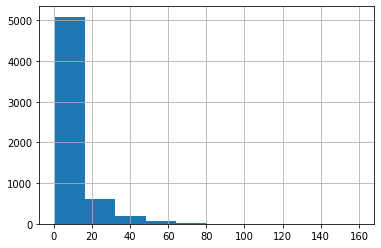

In [22]:
#visualisation through histogram
s_data['Price'].hist() # histogram plot

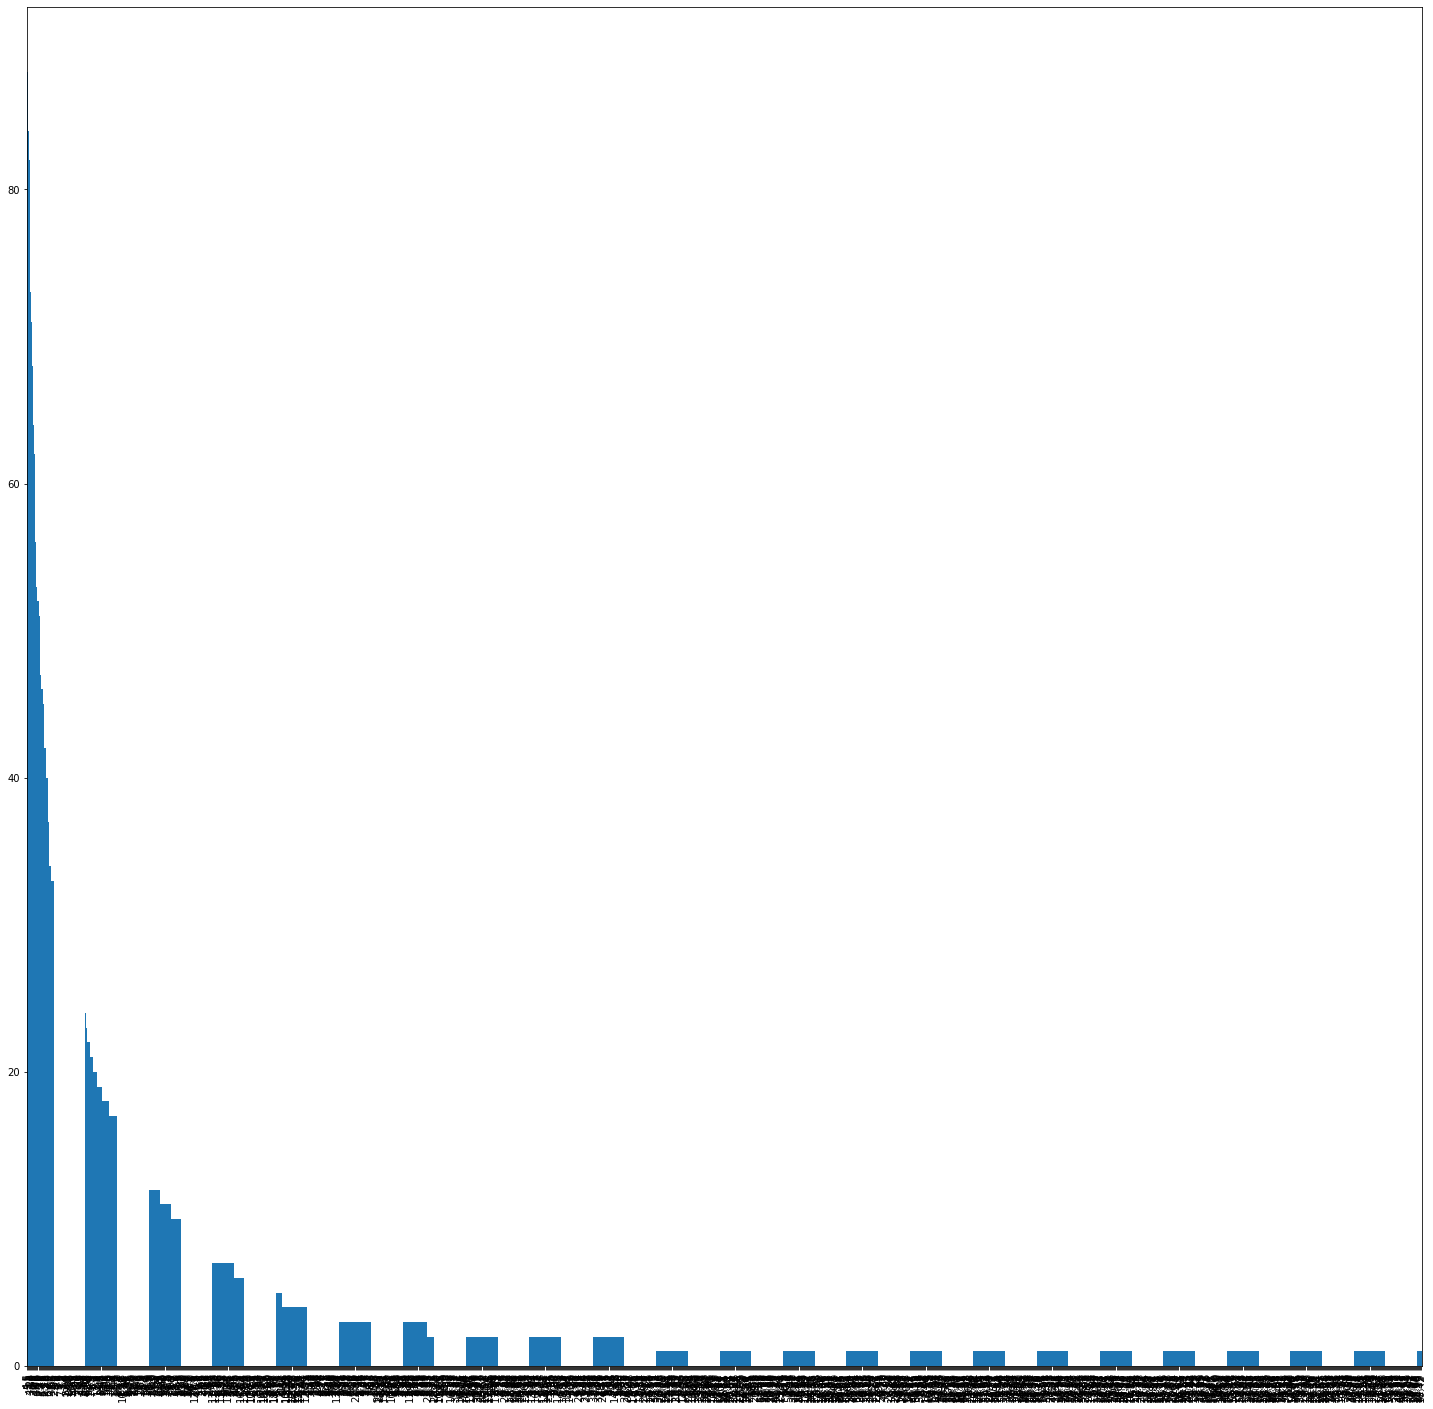

In [23]:
s_data['Price'].value_counts().plot(kind='bar', figsize=[25,25])

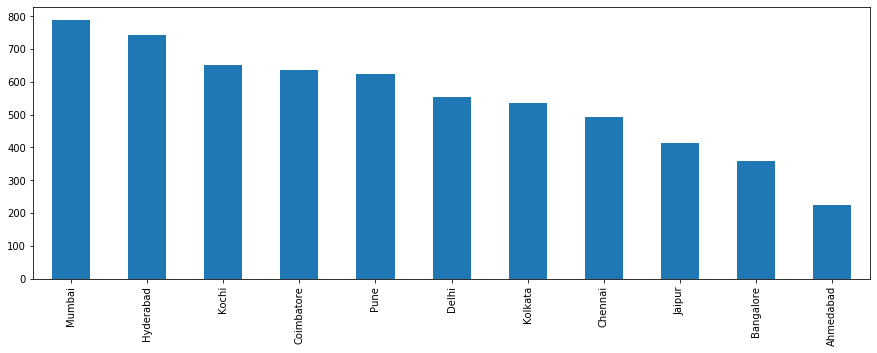

In [24]:
s_data['Location'].value_counts().plot(kind='bar', figsize=[15,5])

The above graph shows the cities with the number cars they are having for the sale.
The graph clearly shows that the city with maximum stuff is Mumbai and city with minimum stuffs is Ahmedabad.

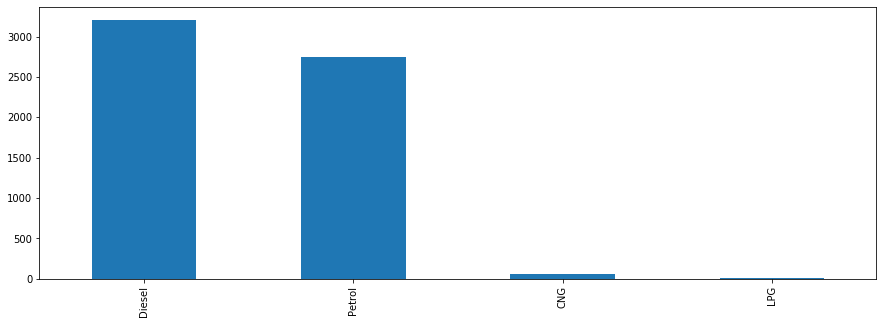

In [25]:
s_data['Fuel_Type'].value_counts().plot(kind='bar', figsize=[15,5])

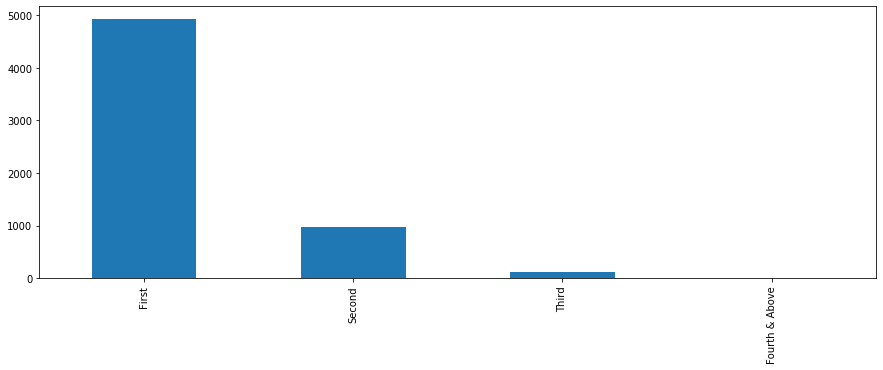

In [26]:
s_data['Owner_Type'].value_counts().plot(kind='bar', figsize=[15,5])

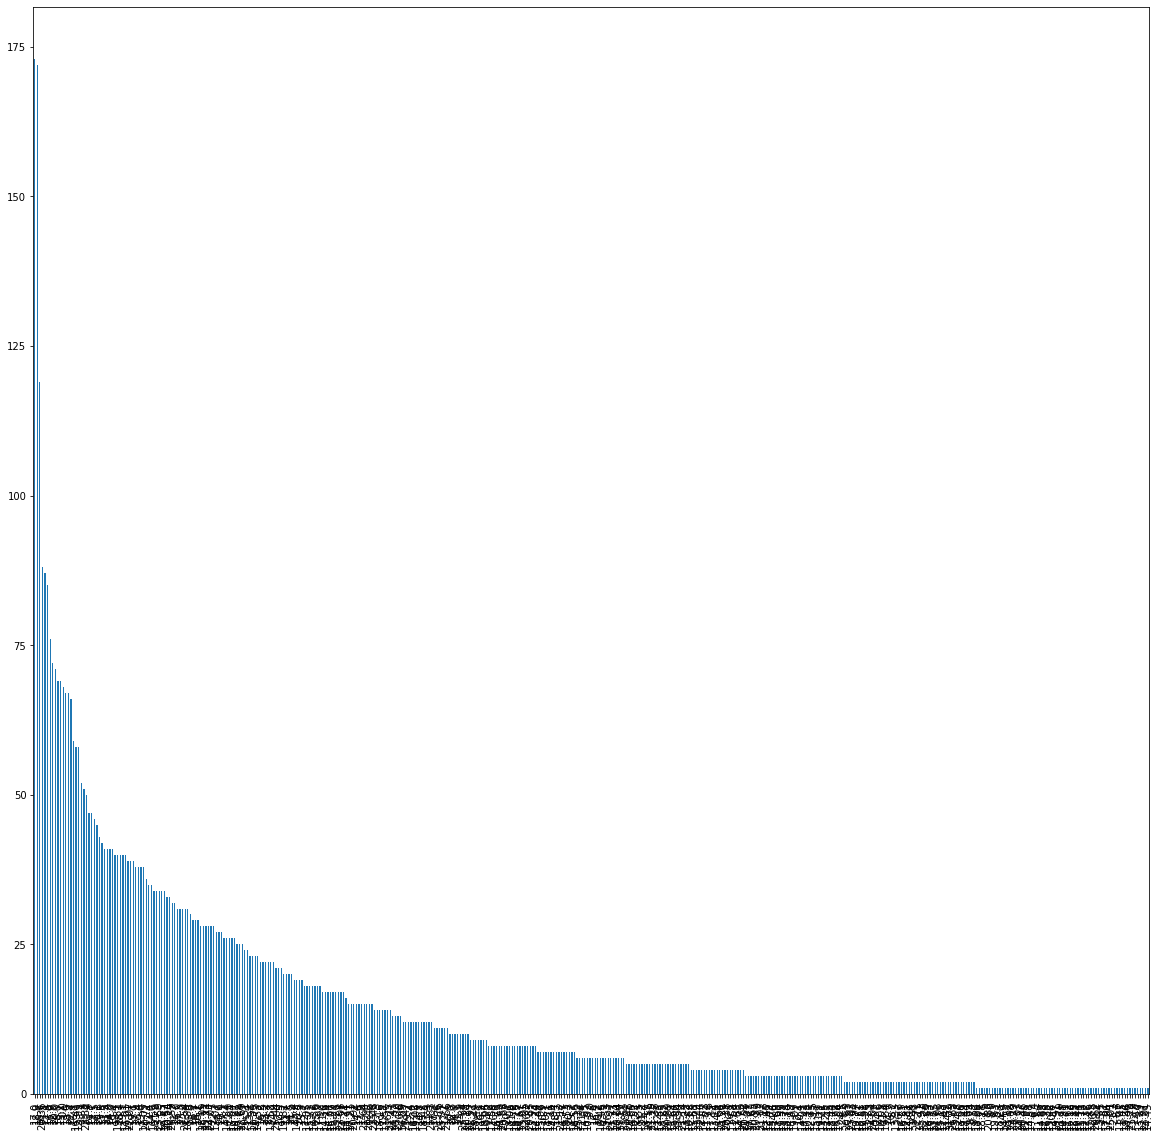

In [27]:
s_data["Mileage"].value_counts().plot(kind='bar',figsize=[20,20])

The above plot shows the no. of cars with various mileages.

There is a decrease in mileage as the no. of cars increases.

That means the no. of cars with a good mileage capacity is lesser than the no of cars with lower mileage.

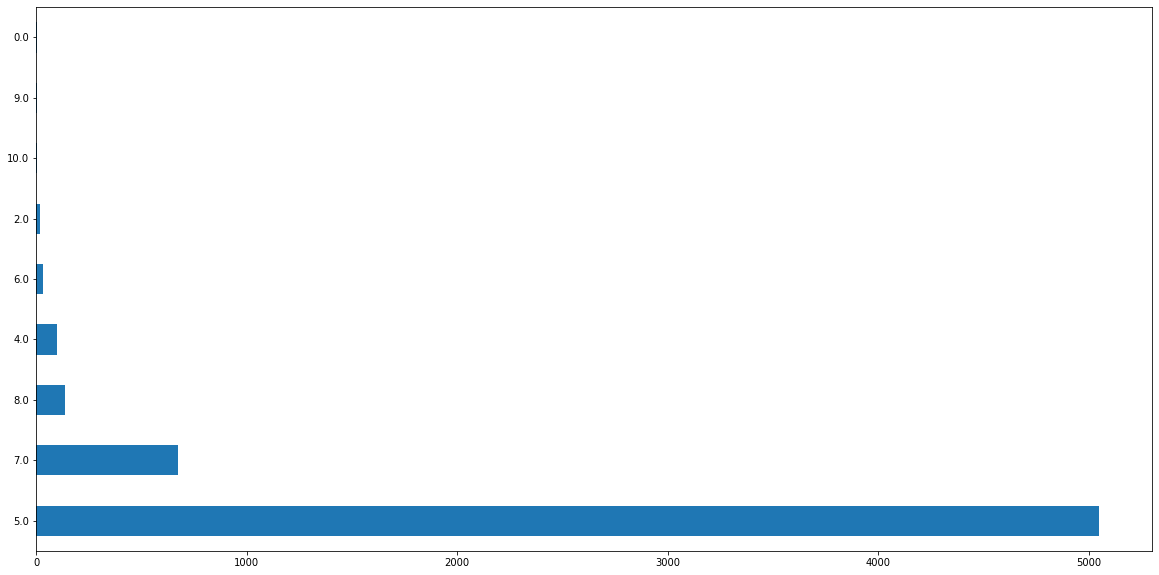

In [28]:
s_data["Seats"].value_counts().plot(kind='barh',figsize=[20,10])

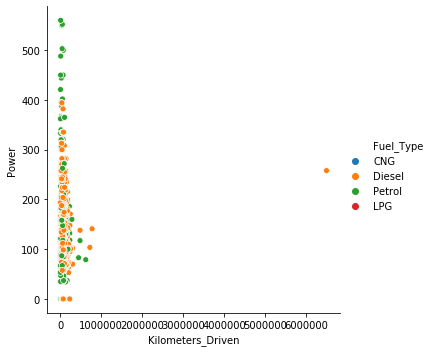

In [29]:
sns.relplot(x="Kilometers_Driven",y="Power",hue="Fuel_Type",data=s_data)

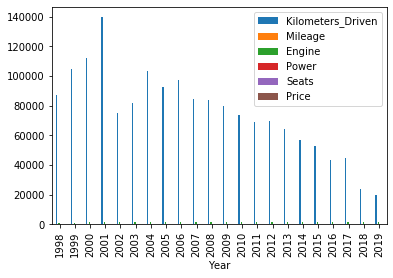

In [30]:
s_data.groupby('Year').mean().plot(kind='bar')

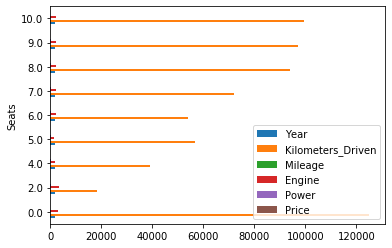

In [31]:
s_data.groupby("Seats").mean().plot(kind='barh')

The above plot shows the relationship of  the no of seats and the kilometers driven.

2 seated cars are least driven.

 This will depict a clear picture before purchasing a car with lower wear and tear.

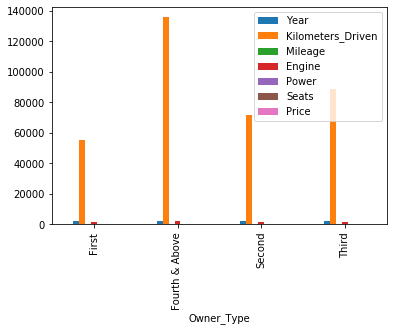

In [32]:
s_data.groupby("Owner_Type").mean().plot(kind='bar')

**The above plot shows the  cars with various owner types and the mean of the kilometres driven.4th and above handed cars are driven for larger no of kilometers and1st/new cars are driven the least It shows a clear idea for choosing the right car.**

In [33]:
print(s_data.min())

Name                 Ambassador Classic Nova Diesel
Location                                  Ahmedabad
Year                                           1998
Kilometers_Driven                               171
Fuel_Type                                       CNG
Transmission                              Automatic
Owner_Type                                    First
Mileage                                           0
Engine                                          624
Power                                             0
Seats                                             0
Price                                          0.44
Car_Brand1                       Ambassador Classic
dtype: object


In [34]:
print(s_data.max())

Name                 Volvo XC90 2007-2015 D5 AWD
Location                                    Pune
Year                                        2019
Kilometers_Driven                        6500000
Fuel_Type                                 Petrol
Transmission                              Manual
Owner_Type                                 Third
Mileage                                    33.54
Engine                                      5998
Power                                        560
Seats                                         10
Price                                        160
Car_Brand1                            Volvo XC90
dtype: object


In [35]:
print(max(s_data['Price']))

160.0


In [36]:
print(min(s_data['Price']))

0.44


In [37]:
print(s_data['Name'][s_data['Price']==max])

Series([], Name: Name, dtype: object)


In [38]:
price_df=s_data.groupby('Name')['Price'].max().reset_index()
print(price_df)

                                Name  Price
0     Ambassador Classic Nova Diesel   1.35
1          Audi A3 35 TDI Attraction  16.50
2             Audi A3 35 TDI Premium  19.25
3        Audi A3 35 TDI Premium Plus  18.90
4          Audi A3 35 TDI Technology  22.50
...                              ...    ...
1868            Volvo XC60 D4 Summum  18.25
1869                   Volvo XC60 D5  32.50
1870       Volvo XC60 D5 Inscription  17.18
1871  Volvo XC90 2007-2015 D5 AT AWD  23.58
1872     Volvo XC90 2007-2015 D5 AWD  23.65

[1873 rows x 2 columns]


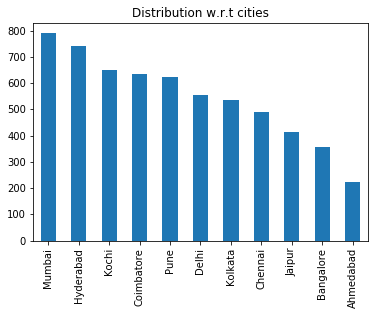

In [39]:
s_data.Location.value_counts().plot(kind='bar')
plt.title('Distribution w.r.t cities')
plt.show()

Text(0.5, 1.0, 'Distribution according to the transmission')

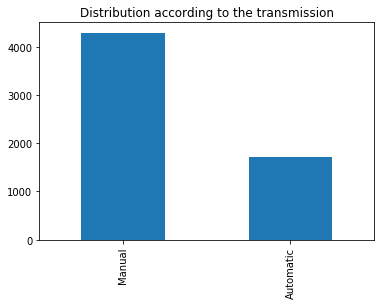

In [40]:
#Transmission
s_data.Transmission.value_counts().plot(kind='bar')
plt.title('Distribution according to the transmission')
# Inference 
# Automatic cars are less in number than Manual cars.

## OVERALL CONCLUSION ON THE BASIS OF THE ANALYSIS

 - MUMBAI CITY IS AT THE TOP IN CAR PRODUCTION AND SALE.
 - THE AVERAGE PRICE OF THE CARS IS ABOUT 9.479 LAKHS
 - AHMEDABAD PRODUCES/SALES LOWEST NO OF CARS.
 - MAX PRICE IS 160 LAKHS.
 - MINIMUM PRICE IS 0.44 LAKHS.
 - DIESEL IS THE MOST COMMONLY USED FUEL IN INDIA FOLLOWED BY PETROL.
 - CNG AND ELECTRIC CARS ARE VERY VERY LESS WHICH IS A MATTER OF REGRET.
 - GOVT.  MUST TAKE RIGHT STEPS TO INCREASE THE CNG AND ELECTRIC FUEL CONSUPTION AND PEOPLE MUST USE CNG AND ELECTRICITY AS FUELS   AS THEY PRODUCE LESS AIR POLLUTION.
 - LESS NO. OF CARS WITH BETTER MILEAGE ARE PRODUCED IN INDIA.
 - MORE NO. OF CARS WITH POORER MILEAGE ARE PRODUCED IN LARGER NUMBER.
 - 1ST HANDED CARS OR THE NEW CARS ARE DRIVEN FOR LESSER DISTANCES, LEAST WEAR AND TEAR.
 - 1ST HANDED CARS ARE PRODUCED IN LARGER NUMBER.
 - 4TH HANDED CARS/ABOVE  ARE DRIVEN FOR MORE DISTANCES,ARE SUPPOSED TO BE MORE DAMAGED.
 - NO. OF 5 SEATER CARS ARE MORE IN NUMBER, IN HIGH DEMAND.
 - 2 SEATER CARS ARE LEAST IN NUMBER.
 - MAXIMUM 10 SEATER CARS ARE THERE,WITH MAXIMUM DISTANCES OF TRAVEL.
 - 2 SEATER CARS ARE RUN FOR LEAST DISTANCES
 - IN 2001, MAXIMUM DISTANCE IS DRIVEN BY CARS AND 2019 IS THE LEAST IN THIS ISSUE.

 LAST BUT NOT THE LEAST, IT IS TOTALLY THE CHOICE OF PEOPLE WHICH CAR THEY ARE GONNA PURCHASE. I JUST GAVE A CLEAR PICTURE.
 OBVIOUSLY 2ND/3RD/4TH OR ABOVE HANDED CARS ARE LESSER IN PRICE AND QUALITY.
 USE OF CNG AND ELECTRICITY AS FUEL MUST BE PROMOTED.

# 4. Handle Categorical variable

In [41]:
s_data = pd.DataFrame(s_data)
print(s_data.shape)

(6014, 13)


In [42]:
s_data["Location"] = s_data["Location"].astype('category')
print(s_data.dtypes)

Name                   object
Location             category
Year                    int64
Kilometers_Driven       int64
Fuel_Type              object
Transmission           object
Owner_Type             object
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
Car_Brand1             object
dtype: object


In [43]:
s_data["Location"] = s_data["Location"].cat.codes
print(s_data.head())

                               Name  Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG         9  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        10  2015              41000   
2                      Honda Jazz V         2  2011              46000   
3                 Maruti Ertiga VDI         2  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic         3  2013              40670   

  Fuel_Type Transmission Owner_Type  Mileage  Engine   Power  Seats  Price  \
0       CNG       Manual      First    26.60   998.0   58.16    5.0   1.75   
1    Diesel       Manual      First    19.67  1582.0  126.20    5.0  12.50   
2    Petrol       Manual      First    18.20  1199.0   88.70    5.0   4.50   
3    Diesel       Manual      First    20.77  1248.0   88.76    7.0   6.00   
4    Diesel    Automatic     Second    15.20  1968.0  140.80    5.0  17.74   

      Car_Brand1  
0   Maruti Wagon  
1  Hyundai Creta  
2     Honda Jazz  
3  Maruti 

In [44]:
s_data["Fuel_Type"] = s_data["Fuel_Type"].astype('category')
print(s_data.dtypes)

Name                   object
Location                 int8
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission           object
Owner_Type             object
Mileage               float64
Engine                float64
Power                 float64
Seats                 float64
Price                 float64
Car_Brand1             object
dtype: object


In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [46]:
s_data['Location'] = label_encoder.fit_transform(s_data['Location'])
s_data['Fuel_Type'] = label_encoder.fit_transform(s_data['Fuel_Type'])
s_data['Transmission'] = label_encoder.fit_transform(s_data['Transmission'])
s_data['Owner_Type'] = label_encoder.fit_transform(s_data['Owner_Type'])
s_data['Name'] = label_encoder.fit_transform(s_data['Name'])

In [47]:
x = s_data.drop(['Price','Car_Brand1'],axis=1)

In [48]:
print(x.head())

   Name  Location  Year  Kilometers_Driven  Fuel_Type  Transmission  \
0  1198         9  2010              72000          0             1   
1   512        10  2015              41000          1             1   
2   486         2  2011              46000          3             1   
3  1058         2  2012              87000          1             1   
4    23         3  2013              40670          1             0   

   Owner_Type  Mileage  Engine   Power  Seats  
0           0    26.60   998.0   58.16    5.0  
1           0    19.67  1582.0  126.20    5.0  
2           0    18.20  1199.0   88.70    5.0  
3           0    20.77  1248.0   88.76    7.0  
4           2    15.20  1968.0  140.80    5.0  


In [49]:
y = s_data['Price']

In [50]:
print(y.head())

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64


# 5. Data Scaling

`Kilometers_Driven`, `Mileage`, `Engine` & `Power` have different ranges. Therefore, normalizing so that each lies in the range [0,1].

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
mms = MinMaxScaler()

In [53]:
x[['Kilometers_Driven', 'Mileage', 'Engine', 'Power']] = mms.fit_transform(x[['Kilometers_Driven', 'Mileage', 'Engine', 'Power']])

In [54]:
x.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,1198,9,2010,0.011051,0,1,0,0.793083,0.069594,0.103857,5.0
1,512,10,2015,0.006282,1,1,0,0.586464,0.178266,0.225357,5.0
2,486,2,2011,0.007051,3,1,0,0.542636,0.106997,0.158393,5.0
3,1058,2,2012,0.013359,1,1,0,0.619261,0.116115,0.158500,7.0
4,23,3,2013,0.006231,1,0,2,0.453190,0.250093,0.251429,5.0


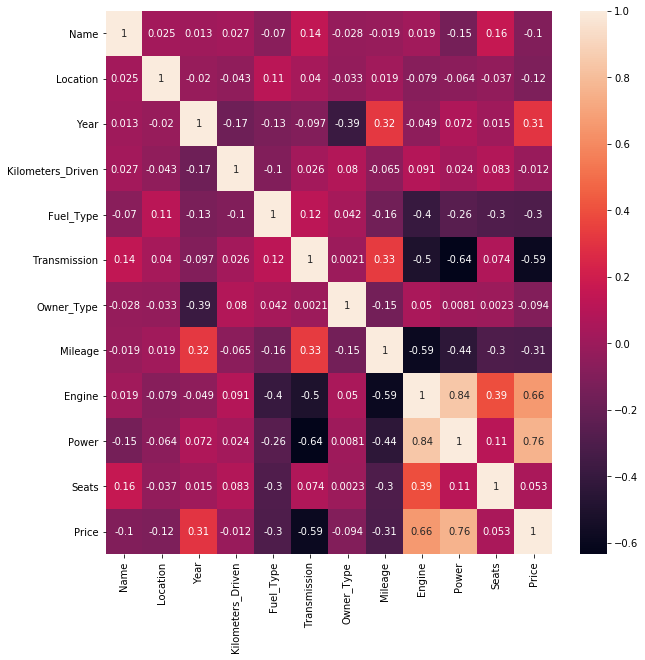

In [55]:
plt.figure(figsize=(10,10)) # Change: Make plot bigger - Ayaan
sns.heatmap(s_data.corr(),annot = True)

# 6. Train-Test Split
### *Smahi Shah, Rohan Dhoundiyal, G S Bharath & Mohd Ayaan Anwar*

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size = 0.75)

In [58]:
xTest

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
5666,710,4,2017,0.001358,3,1,0,0.554562,0.106624,0.146125,5.0
2801,1452,3,2017,0.008172,3,0,0,0.670841,0.069780,0.119643,5.0
392,1333,3,2017,0.008659,1,0,0,0.402504,0.439710,0.503571,5.0
5668,283,5,2007,0.010436,1,1,0,0.530710,0.144213,0.121429,5.0
5170,258,5,2014,0.020847,1,1,0,0.676804,0.162635,0.160429,5.0
...,...,...,...,...,...,...,...,...,...,...,...
2772,637,9,2011,0.009451,3,1,0,0.509839,0.179940,0.216607,5.0
719,58,3,2015,0.007202,1,0,2,0.359869,0.435988,0.431071,7.0
727,714,2,2010,0.010392,3,1,0,0.551580,0.106624,0.142857,5.0
3709,419,5,2011,0.010983,3,1,0,0.506857,0.162449,0.210714,5.0


In [59]:
print(len(xTrain))
print(len(xTest))
print(len(yTrain))
print(len(yTest))

4510
1504
4510
1504


In [60]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4510 entries, 309 to 5233
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4510 non-null   int64  
 1   Location           4510 non-null   int64  
 2   Year               4510 non-null   int64  
 3   Kilometers_Driven  4510 non-null   float64
 4   Fuel_Type          4510 non-null   int64  
 5   Transmission       4510 non-null   int64  
 6   Owner_Type         4510 non-null   int64  
 7   Mileage            4510 non-null   float64
 8   Engine             4510 non-null   float64
 9   Power              4510 non-null   float64
 10  Seats              4510 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 422.8 KB


In [61]:
xTrain.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

# 7. Applying ML Models with Error Metrics
### *Smahi Shah, Rohan Dhoundiyal, G S Bharath & Mohd Ayaan Anwar*

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

## I. Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
model = LinearRegression()
model.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
coef = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])

In [66]:
predictions = model.predict(xTest)

### Error Metrics

<Figure size 432x288 with 0 Axes>

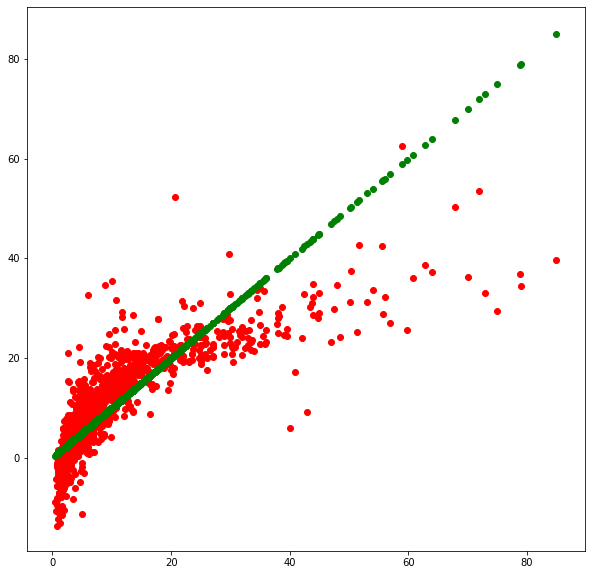

In [67]:
plt.tight_layout()
plt.figure(figsize=(10,10))
plt.scatter(yTest,predictions, color='red')
plt.scatter(yTest, yTest, color='green')

In [68]:
lr_errors = mean_absolute_error(yTest, predictions)
# Calculate mean absolute percentage error (MAPE)
lr_mape = 100 * (lr_errors / yTest)
# Calculate and display accuracy
lr_accuracy = 100 - np.mean(lr_mape)
print('Mean Absolute Error:', mean_absolute_error(yTest, predictions))
print('Accuracy:', round(lr_accuracy, 2), '%.')
print("Root Mean Square Error:", sqrt(mean_squared_error(yTest, predictions)))
print("Mean Square Error:", mean_squared_error(yTest, predictions))
print("R2 Error: ", r2_score(yTest, predictions)*100)

Mean Absolute Error: 3.9267785791314544
Accuracy: 10.75 %.
Root Mean Square Error: 6.222751620520377
Mean Square Error: 38.72263773068897
R2 Error:  66.30475673768919


## II. Polynomial Regression

### Analysing how many features we need for polynomial regression.

In [69]:
# we are feature selecting like removed transmission,Year etc...
X = s_data.drop(['Car_Brand1','Price','Name','Year','Transmission','Power','Fuel_Type'],axis=1)
Y = s_data['Price']

# using all features except Name
x= s_data.drop(['Car_Brand1', 'Price','Name'],axis=1)
y= s_data['Price']

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, train_size = 0.75)
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, train_size = 0.75,random_state=0)
print("The length of the X_Train is {} and X_Test is {} ".format(len(X_Train),len(X_Test)))
print("The length of the x_Train is {} and y_Test is {} ".format(len(x_Train),len(y_Test)))

The length of the X_Train is 4510 and X_Test is 1504 
The length of the x_Train is 4510 and y_Test is 1504 


Trying Polynomial Regression with 2 different degrees and seeing the error metrics

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(x_Train,y_Train)
polyreg_f=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg_f.fit(X_Train,Y_Train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [71]:
poly_pred=polyreg.predict(x_Test)
poly_pred_f=polyreg_f.predict(X_Test)

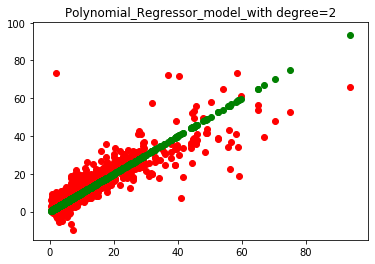

In [72]:
plt.title('Polynomial_Regressor_model_with degree=2')
plt.scatter(y_Test,poly_pred, color='red')
plt.scatter(y_Test, y_Test, color='green')

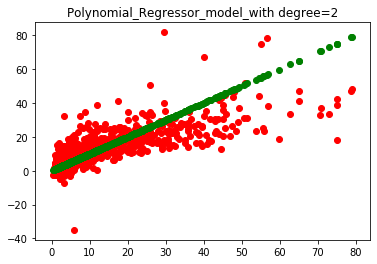

In [73]:
plt.title('Polynomial_Regressor_model_with degree=2')
plt.scatter(Y_Test,poly_pred_f, color='red')
plt.scatter(Y_Test, Y_Test, color='green')

#### Error Metrics for degree 2

In [74]:
poly_errors = abs(poly_pred - y_Test)
print('Mean Absolute Error(MAE):', round(np.mean(poly_errors), 2))
# Calculate Mean Absolute Percentage Error (MAPE)
poly_MAPE = 100 * (poly_errors / y_Test)
print('Mean Absolute Percentage Error (MAPE) ',np.mean(np.abs((y_Test - poly_pred) / y_Test)) * 100)
# Calculate and display accuracy
poly_accuracy = 100 - np.mean(poly_MAPE)
print('Accuracy:', round(poly_accuracy, 2), '%.')
mse = mean_squared_error(y_Test, poly_pred)
rmse = math.sqrt(mse)
print('The Root Mean Squared Error (RMSE) is ',rmse)
print('The R-squared error is ', r2_score(y_Test,poly_pred)*100)

Mean Absolute Error(MAE): 2.47
Mean Absolute Percentage Error (MAPE)  39.69521741490139
Accuracy: 60.3 %.
The Root Mean Squared Error (RMSE) is  4.784609266430778
The R-squared error is  79.45112741192439


In [75]:
print('We will see the error metrics with less features... in polynomial regression.\n')
poly_errors_f = abs(poly_pred_f - Y_Test)
print('Mean Absolute Error(MAE):', round(np.mean(poly_errors_f), 2))
# Calculate Mean Absolute Percentage Error (MAPE)
poly_MAPE_f = 100 * (poly_errors_f / y_Test)
print('Mean Absolute Percentage Error (MAPE) ',np.mean(np.abs((Y_Test - poly_pred_f) / Y_Test)) * 100)
# Calculate and display accuracy
poly_accuracy_f = 100 - np.mean(poly_MAPE_f)
print('Accuracy:', round(poly_accuracy_f, 2), '%.')
mse = mean_squared_error(Y_Test, poly_pred_f)
rmse_f = math.sqrt(mse)
print('The Root Mean Squared Error (RMSE) is ',rmse_f)
print('The R-squared error is ',r2_score(Y_Test,poly_pred_f)*100)

We will see the error metrics with less features... in polynomial regression.

Mean Absolute Error(MAE): 4.12
Mean Absolute Percentage Error (MAPE)  65.1199553789207
Accuracy: 33.57 %.
The Root Mean Squared Error (RMSE) is  6.908311216066996
The R-squared error is  61.956519022736146


**Conclusion**: if we have more features our predictions will be more accurate.

### Trying Polynomial Regression with a Higher Degree

In [76]:
degree1=3
polyreg1=make_pipeline(PolynomialFeatures(degree1),LinearRegression())
polyreg1.fit(x_Train,y_Train)
poly_pred1=polyreg1.predict(x_Test)

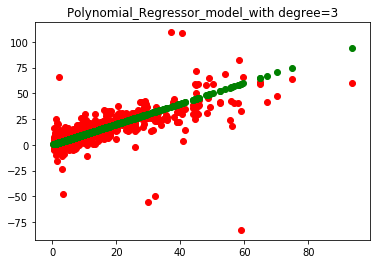

In [77]:
plt.title('Polynomial_Regressor_model_with degree=3')
plt.scatter(y_Test,poly_pred1, color='red')
plt.scatter(y_Test, y_Test, color='green')

#### Error Metrics for degree = 3

In [78]:
poly_errors1 = abs(poly_pred1 - y_Test)
print('Mean Absolute Error(MAE):', round(np.mean(poly_errors1), 2))
# Calculate Mean Absolute Percentage Error (MAPE)
poly_MAPE1 = 100 * (poly_errors1 / y_Test)
print('Mean Absolute Percentage Error (MAPE) ',np.mean(np.abs((y_Test - poly_pred1) / y_Test)) * 100)
# Calculate and display accuracy
poly_accuracy1 = 100 - np.mean(poly_MAPE1)
print('Accuracy:', round(poly_accuracy1, 2), '%.')
mse = mean_squared_error(y_Test, poly_pred1)
rmse = math.sqrt(mse)
print('The Root Mean Squared Error (RMSE) is ',rmse)
print('The R-squared error is ',r2_score(y_Test,poly_pred1)*100)

Mean Absolute Error(MAE): 3.79
Mean Absolute Percentage Error (MAPE)  68.25799679296681
Accuracy: 31.74 %.
The Root Mean Squared Error (RMSE) is  7.8936243330633316
The R-squared error is  44.06959640986875


## III. Gradient Boost

In [79]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

In [80]:
params = {'n_estimators': 2100,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_Train, y_Train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=5,
                          min_weight_fraction_leaf=0.0, n_estimators=2100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Error Metrics

In [81]:
mse = mean_squared_error(y_Test, reg.predict(x_Test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
r2_score(y_Test,reg.predict(x_Test))*100
reg_pred=reg.predict(x_Test)
reg_errors = abs(reg_pred - y_Test)
print('Mean Absolute Error(MAE):', round(np.mean(reg_errors), 2))
# Calculate Mean Absolute Percentage Error (MAPE)
reg_MAPE = 100 * (reg_errors / y_Test)
print('Mean Absolute Percentage Error (MAPE) ',np.mean(np.abs((y_Test - reg_pred) / y_Test)) * 100)
# Calculate and display accuracy
reg_accuracy = 100 - np.mean(reg_MAPE)
print('Accuracy:', round(reg_accuracy, 2), '%.')

The mean squared error (MSE) on test set: 14.8418
Mean Absolute Error(MAE): 1.54
Mean Absolute Percentage Error (MAPE)  20.684596492378006
Accuracy: 79.32 %.


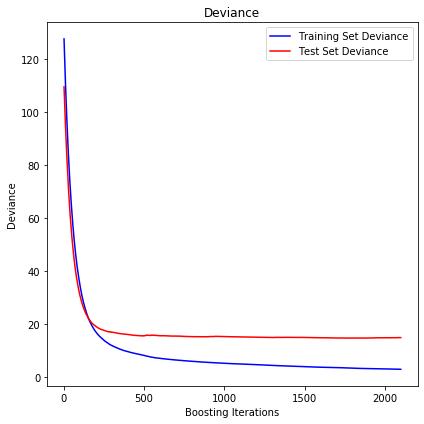

In [82]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_Test)):
    test_score[i] = reg.loss_(y_Test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

## IV. Random Forest

In [83]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(xTrain, yTrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [84]:
rf_predictions = rf.predict(xTest)

In [85]:
rf_errors = abs(rf_predictions - yTest)

### Error Metrics

In [86]:
print('Mean Absolute Error:', round(np.mean(rf_errors), 2))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (rf_errors / yTest)
# Calculate and display accuracy
rf_accuracy = 100 - np.mean(mape)
print('Accuracy:', round(rf_accuracy, 2), '%.')
print("Root Mean Square Error:", sqrt(mean_squared_error(yTest, rf_predictions)))
print("Mean Square Error:", mean_squared_error(yTest, rf_predictions))
print("R2 Error: ", r2_score(yTest, rf_predictions)*100)

Mean Absolute Error: 1.46
Accuracy: 83.5 %.
Root Mean Square Error: 3.25591618292644
Mean Square Error: 10.600990190242277
R2 Error:  90.77534578698163


<Figure size 432x288 with 0 Axes>

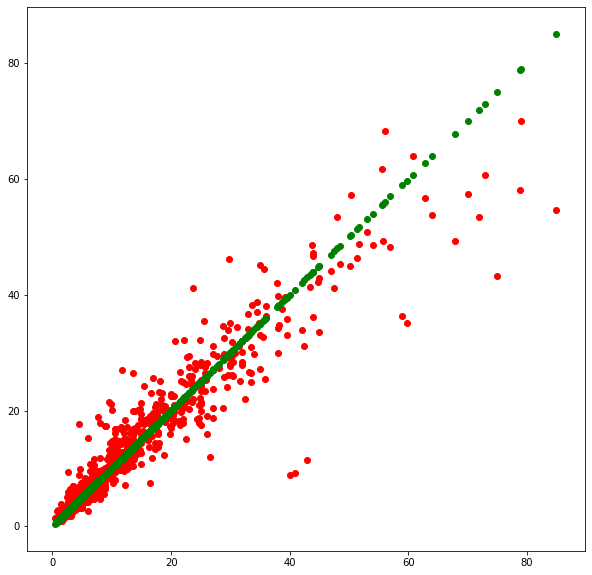

In [87]:
plt.tight_layout()
plt.figure(figsize=(10,10))
plt.scatter(yTest,rf_predictions, color='red')
plt.scatter(yTest, yTest, color='green')

## V. Grid Seach CV with Random Forest

In [88]:
from sklearn.model_selection import RandomizedSearchCV
RFR=RandomForestRegressor(n_estimators=1000)
# Number of trees in random forest
n_estimators = [1000]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [5]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2 ]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap} 
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_Train, y_Train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/home/ayaan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=50. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:    4.9s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:   11.0s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   11.3s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                             

### Error Metrics

In [89]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_Test, y_Test)

Average Error: 1.5263 degrees.
Accuracy = 80.50%.
